In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import h5py
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d
from common import CosmoInterpolator
import json
import healpy as hp

label_fontsize = 18
tick_fontsize = 18
title_fontsize = 18

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["figure.figsize"] = (4, 3)


startup


In [2]:
cosmo = CosmoInterpolator()
h5_path = "pe_results.h5"
h5f = h5py.File(h5_path, "r")
snr_threshold = 10.0


In [3]:
processed_results = []
for source in h5f:
    # if "a=-0.99" in source:
    # Extract m1 and redshift using regex
    m1_match = re.search(r"m1=([0-9.eE+-]+)", source)
    z_match = re.search(r"z=([0-9.eE+-]+)", source)
    a_match = re.search(r"a=([0-9.eE+-]+)", source)
    if m1_match and z_match:
        m1 = float(m1_match.group(1))
        z = float(z_match.group(1))
        a = float(a_match.group(1))
        snr = h5f[source]["snr"][()]
        sky_loc = h5f[source]["sky_loc"][()]
        # print(h5f[source]["absolute_errors_a"]["error_detector"][...])
        # for key in h5f[source].keys():
        #     print(key)
        #     print(f"{key}: {h5f[source][key]['error_detector'][()].shape}")
        snr_cut = snr > snr_threshold
        sky_loc = sky_loc[snr_cut]
        temp_ = {key: h5f[source][key]["error_source"][snr_cut] for key in h5f[source].keys() if "error" in key}
        processed_results.append({'m1': m1, 'a': a, 'redshift': z, 'snr': snr[snr_cut], 'sky_loc': sky_loc, **temp_})

# Convert to DataFrame for easier analysis
df_results = pd.DataFrame(processed_results)
np.sum(df_results['a'] == 0.99),np.sum(df_results['a'] == -0.99),np.sum(df_results['a'] == 0.0),
print(df_results.columns.tolist())


['m1', 'a', 'redshift', 'snr', 'sky_loc', 'absolute_errors_Omega', 'absolute_errors_a', 'absolute_errors_dist', 'absolute_errors_e0', 'absolute_errors_iota', 'absolute_errors_p0', 'relative_errors_M', 'relative_errors_mu']


In [4]:
df_results

,m1,a,redshift,snr,sky_loc,absolute_errors_Omega,absolute_errors_a,absolute_errors_dist,absolute_errors_e0,absolute_errors_iota,absolute_errors_p0,relative_errors_M,relative_errors_mu
0,1000.0,-0.99,0.043337,"[11.447284994448236, 13.50942094574813, 22.186...","[[2.4876218221174766, 3.8454859339949197], [0....","[58.955713750423456, 93.53943072110434, 52.181...","[0.015002101856103678, 0.011623695415246915, 0...","[0.04539779038607011, 0.10955085088660581, 0.0...","[0.0047870507664148215, 0.003538097062010354, ...","[0.5788813501274894, 0.3149155359348791, 0.332...","[0.42816706477233346, 0.3679157700961509, 0.26...","[0.011040383992465767, 0.02519782734949404, 0....","[0.010723479216230713, 0.02369741078582753, 0...."
1,1000.0,0.00,0.043591,"[11.314478375154527, 11.816413622500855, 25.39...","[[2.4876218221174766, 3.8454859339949197], [0....","[51.95869375943448, 66.64373829018768, 53.9613...","[0.08609944828331935, 0.06450773658137933, 0.0...","[0.04154103113005634, 0.07958234454409041, 0.0...","[0.0023443697562914325, 0.0018049545375285914,...","[0.5246467289648465, 0.2689721212171505, 0.448...","[0.335846895665366, 0.27011112299406353, 0.187...","[0.009308753486787686, 0.017758675793492006, 0...","[0.009911599005807396, 0.017563278492441343, 0..."
2,1000.0,0.99,0.044156,"[11.417540883381927, 12.024500427313471, 25.42...","[[2.4876218221174766, 3.8454859339949197], [0....","[49.835684538428396, 61.94369042673542, 49.246...","[0.0035060954484712704, 0.0030587392539042834,...","[0.039728952512522106, 0.07571344830062529, 0....","[5.851946444332173e-05, 4.8648867015203324e-05...","[0.49736873686758776, 0.2474848738900064, 0.44...","[0.0707087297526074, 0.060383720819998404, 0.0...","[0.008707532788241575, 0.016525246185301486, 0...","[0.00873695139383424, 0.016611443597406572, 0...."
3,10000.0,-0.99,0.103455,"[11.932037380280876, 13.30655755598105, 27.498...","[[2.4876218221174766, 3.8454859339949197], [0....","[58.911446388515785, 39.421487502549446, 23.41...","[0.002964088771516166, 0.0026849016759277807, ...","[0.048025379704742195, 0.08728964580985521, 0....","[0.006438563101257667, 0.005955480665161183, 0...","[0.0862909372451258, 0.13162451888641907, 0.15...","[0.07051047564739131, 0.06374833737540532, 0.0...","[0.009700109538899349, 0.017736104723773686, 0...","[0.009997248049798624, 0.017787825649642437, 0..."
4,10000.0,0.00,0.105428,"[11.635686994376112, 12.986157495971177, 28.41...","[[2.4876218221174766, 3.8454859339949197], [0....","[43.11952072164623, 29.590673998460524, 16.274...","[0.002143228143467263, 0.001644485421882231, 0...","[0.04916954813917048, 0.08513183377695915, 0.0...","[0.002439752140992459, 0.002189999766408656, 0...","[0.08723640686437642, 0.12553676400595154, 0.1...","[0.029425206886045087, 0.02426183514971331, 0....","[0.009787046694005624, 0.017095480319555652, 0...","[0.010094884615578389, 0.017320868448929654, 0..."
5,10000.0,0.99,0.105641,"[11.626432773228505, 13.007215621234865, 28.26...","[[2.4876218221174766, 3.8454859339949197], [0....","[43.35991387195553, 28.91782241734519, 17.6239...","[0.0005704685514881763, 0.00044370956140065863...","[0.047973981178065915, 0.0847074610626224, 0.0...","[0.00015805702624270524, 0.0001431689003364306...","[0.08733358108089063, 0.1251798415718853, 0.15...","[0.008560502915638046, 0.007378081696439607, 0...","[0.009750537598756772, 0.017168593505571848, 0...","[0.009681468427295531, 0.017111920388207937, 0..."
6,100000.0,-0.99,0.307754,"[11.049801278845646, 12.202028387929166, 28.00...","[[2.4876218221174766, 3.8454859339949197], [0....","[73.64535441217537, 39.87750053988152, 27.7755...","[0.0013192403408582526, 0.0013078204938950743,...","[0.17017469238027444, 0.3052903370366555, 0.25...","[0.020177013815949055, 0.016085038807346592, 0...","[0.08366033862323875, 0.13965400163203592, 0.1...","[0.00879874383237261, 0.008763670575438493, 0....","[0.028523827762410334, 0.05097596943308969, 0....","[0.028257423730176128, 0.05073647448659485, 0...."
7,10000

In [5]:
m1_list = np.unique(df_results["m1"].to_numpy())

def get_error(error_name='relative_errors_M', a=0.99):
    df_temp = df_results[(df_results['a'] == a)]
    snr = df_temp["snr"][(df_results['a'] == a)].to_numpy()    
    err = df_temp[error_name].to_numpy()
    mlist = df_results["m1"][(df_results['a'] == a)].to_numpy()
    skyloc = df_temp["sky_loc"][(df_results['a'] == a)].to_numpy()
    dl = cosmo.get_luminosity_distance(df_temp["redshift"].to_numpy())
    return mlist, err, snr, skyloc, dl

mvec, errors, snr_values, skyloc_values, dl_values =  get_error()

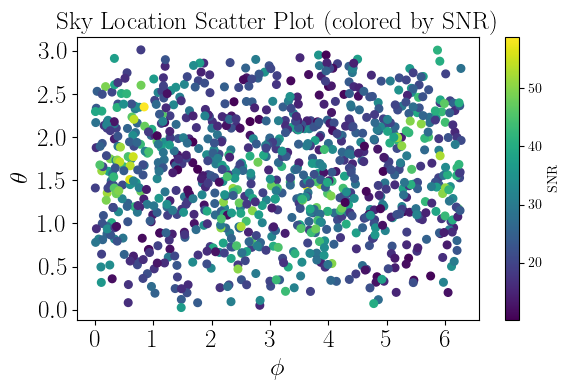

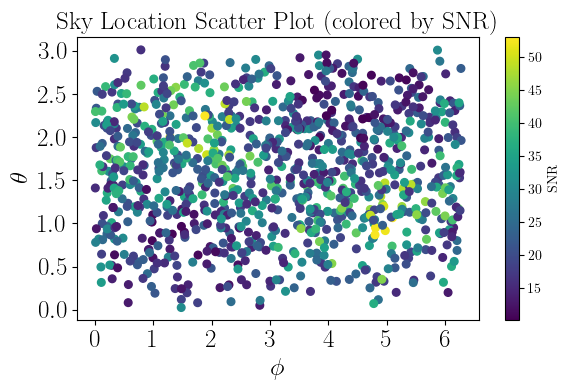

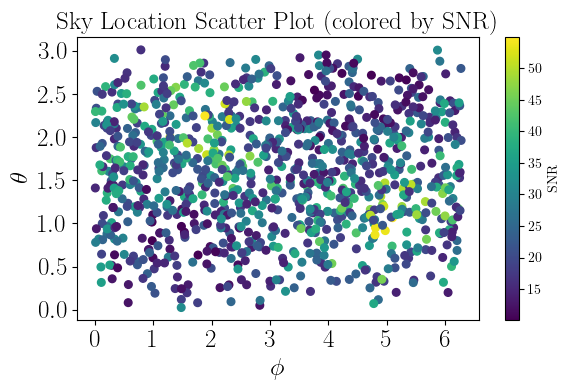

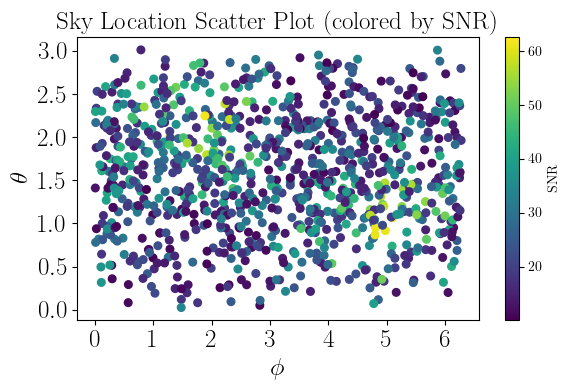

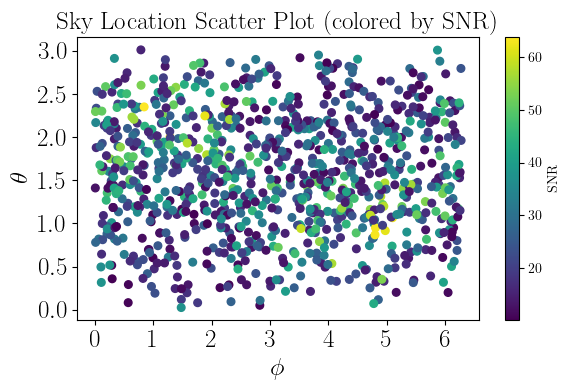

In [6]:
ind = 0
for ind in range(len(mvec)):

    sky_loc = skyloc_values[ind]
    theta = sky_loc[:, 0]
    phi = sky_loc[:, 1]
    plt.figure(figsize=(6, 4))
    sc = plt.scatter(phi, theta, c=snr_values[ind], cmap='viridis', s=30)
    plt.colorbar(sc, label='SNR')
    plt.xlabel(r'$\phi$', fontsize=label_fontsize)
    plt.ylabel(r'$\theta$', fontsize=label_fontsize)
    plt.title('Sky Location Scatter Plot (colored by SNR)', fontsize=title_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.tight_layout()
    plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3043368/1406248173.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f"$\log_{{10}}$ {ylabel}/{ylabel}", fontsize=label_fontsize)
/tmp/ipykernel_3043368/1406248173.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f"$\log_{{10}}$ {ylabel}", fontsize=label_fontsize)


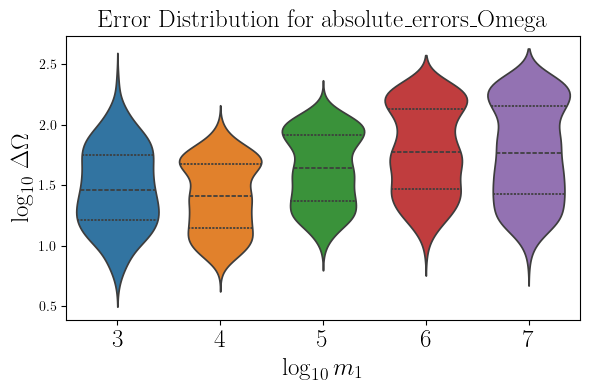

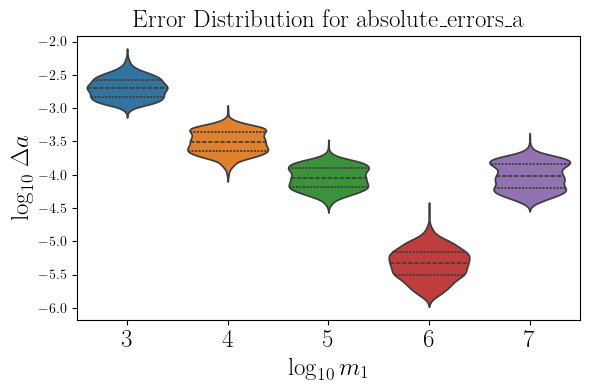

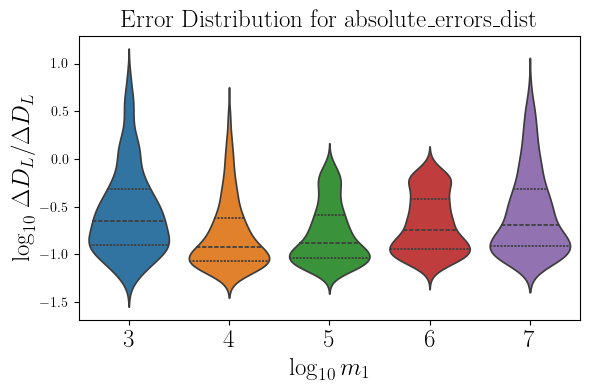

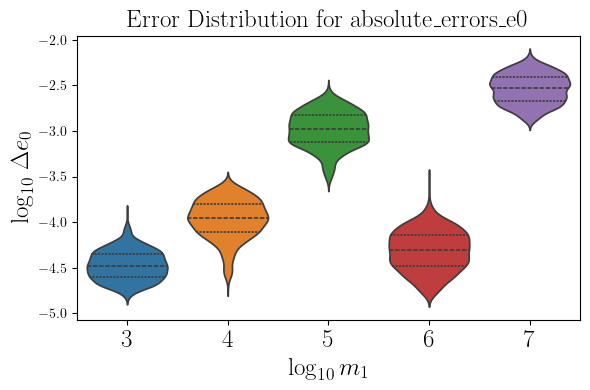

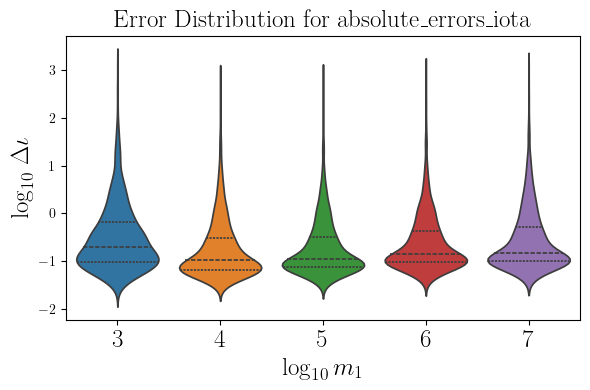

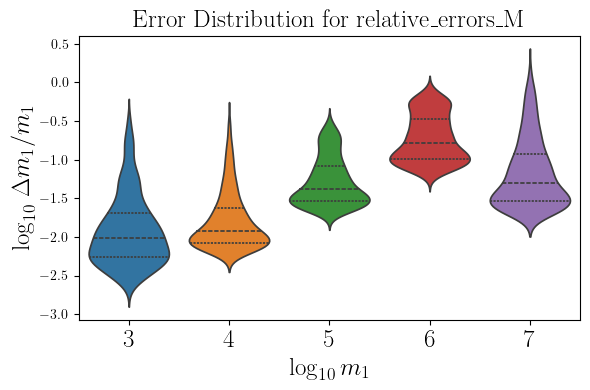

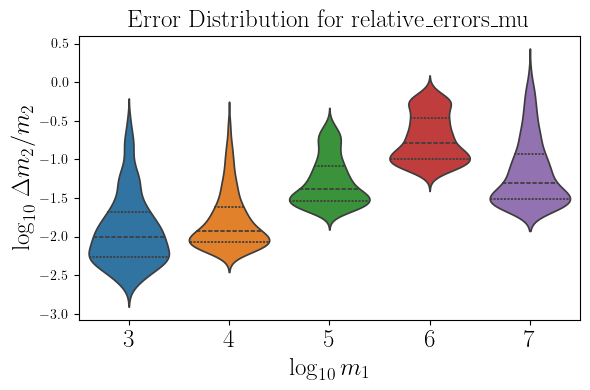

In [7]:
from matplotlib.ticker import ScalarFormatter

list_error_names =  ['absolute_errors_Omega', 'absolute_errors_a', 'absolute_errors_dist', 'absolute_errors_e0', 'absolute_errors_iota', 'relative_errors_M', 'relative_errors_mu']
ylabels = [r"$\Delta \Omega$", r"$\Delta a$", r"$\Delta D_L$", r"$\Delta e_0$", r"$\Delta \iota$", r"$\Delta m_1/m_1$", r"$\Delta m_2/m_2$"]
for ername, ylabel in zip(list_error_names, ylabels):
    mvec, errors, snr_values, sky, dl = get_error(error_name=ername)
    
    plt.figure(figsize=(6, 4))
    if ername == 'absolute_errors_dist':
        sns.violinplot(data=[np.log10(errors[0]/dl[0]), np.log10(errors[1]/dl[1]), np.log10(errors[2]/dl[2]), np.log10(errors[3]/dl[3]), np.log10(errors[4]/dl[4])], inner="quartile")
        plt.ylabel(f"$\log_{{10}}$ {ylabel}/{ylabel}", fontsize=label_fontsize)
    else:
        sns.violinplot(data=[np.log10(errors[0]), np.log10(errors[1]), np.log10(errors[2]), np.log10(errors[3]), np.log10(errors[4])], inner="quartile")
        plt.ylabel(f"$\log_{{10}}$ {ylabel}", fontsize=label_fontsize)
    plt.xticks(ticks=np.arange(len(mvec)), labels=[f"{int(np.log10(m))}" for m in mvec], fontsize=tick_fontsize)
    plt.xlabel(r"$\log_{{10}}m_1$", fontsize=label_fontsize)
    
    plt.title(f"Error Distribution for {ername}", fontsize=title_fontsize)
    # plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    plt.tight_layout()
    plt.savefig(f"requirements_results/error_distribution_{ername}.png", dpi=300)
    

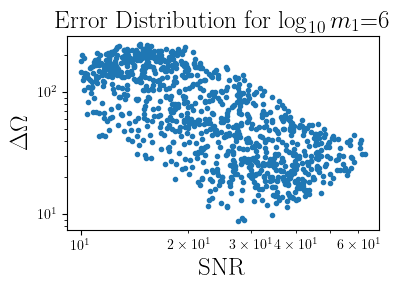

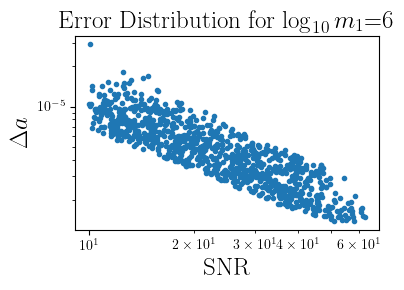

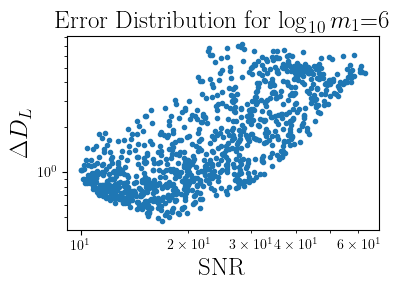

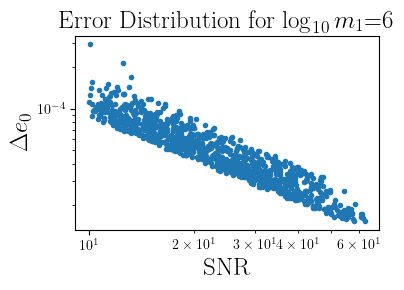

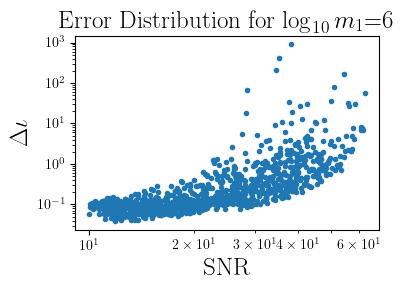

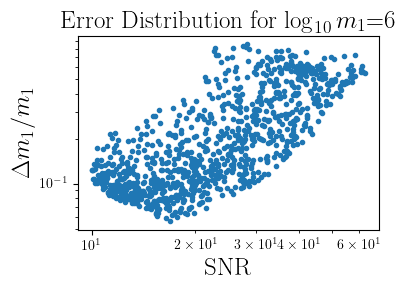

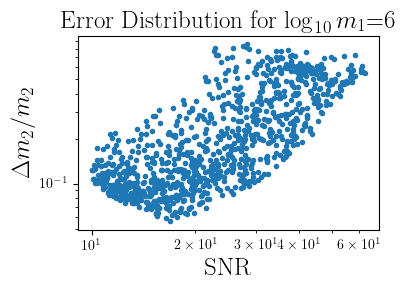

In [8]:
list_error_names =  ['absolute_errors_Omega', 'absolute_errors_a', 'absolute_errors_dist', 'absolute_errors_e0', 'absolute_errors_iota', 'relative_errors_M', 'relative_errors_mu']
ylabels = [r"$\Delta \Omega$", r"$\Delta a$", r"$\Delta D_L$", r"$\Delta e_0$", r"$\Delta \iota$", r"$\Delta m_1/m_1$", r"$\Delta m_2/m_2$"]
mvec, errors, snr_values, sky, dl = get_error(error_name=ername)

ind = 3

for ername, ylabel in zip(list_error_names, ylabels):
    mvec, errors, snr_values, sky, dl = get_error(error_name=ername)
    plt.figure()
    plt.title(fr"Error Distribution for $\log_{{10}} m_1$={int(np.log10(mvec[ind]))}", fontsize=title_fontsize)
    plt.loglog(snr_values[ind], errors[ind], '.')
    plt.xlabel(r"SNR", fontsize=label_fontsize)
    plt.ylabel(f"{ylabel}", fontsize=label_fontsize)
    # plt.title(f"Error Distribution for {ername}", fontsize=title_fontsize)
    plt.tight_layout()
    plt.show()


In [9]:
list_error_names

['absolute_errors_Omega',
 'absolute_errors_a',
 'absolute_errors_dist',
 'absolute_errors_e0',
 'absolute_errors_iota',
 'relative_errors_M',
 'relative_errors_mu']

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3043368/3643984253.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.loglog(err_x[0], err_y[0], '.', label=f"$\log_{{10}} m_1$={int(np.log10(mvec[0]))}")


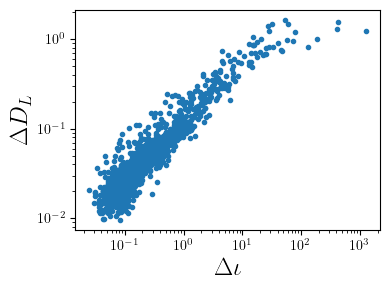

In [10]:
ername = 'absolute_errors_iota'
mvec, err_x, snr_values, sky, dl = get_error(error_name=ername)
ername = 'absolute_errors_dist'
mvec, err_y, snr_values, sky, dl = get_error(error_name=ername)
plt.figure()
plt.loglog(err_x[0], err_y[0], '.', label=f"$\log_{{10}} m_1$={int(np.log10(mvec[0]))}")
plt.xlabel(r"$\Delta \iota$", fontsize=label_fontsize)
plt.ylabel(r"$\Delta D_L$", fontsize=label_fontsize)
plt.tight_layout()
plt.show()

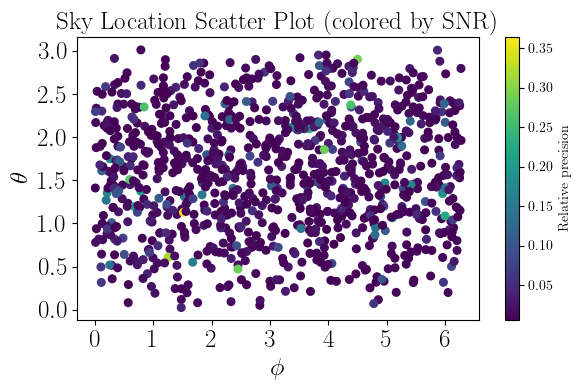

In [11]:
ind = 1
ername, ylabel = list_error_names[5], ylabels[5]
mvec, errors, snr_values, sky, dl = get_error(error_name=ername)

sky_loc = sky[ind]
theta = sky_loc[:, 0]
phi = sky_loc[:, 1]
plt.figure(figsize=(6, 4))
sc = plt.scatter(phi, theta, c=errors[ind], cmap='viridis', s=30)
plt.colorbar(sc, label='Relative precision')
plt.xlabel(r'$\phi$', fontsize=label_fontsize)
plt.ylabel(r'$\theta$', fontsize=label_fontsize)
plt.title('Sky Location Scatter Plot (colored by SNR)', fontsize=title_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.tight_layout()
plt.show()